# Notebook for plotting BF Kernels generated with Gen 3.

Initially written 22 Jun 2021 by Craig Lage.

In [1]:
import os, sys, time, datetime, glob, subprocess
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
from scipy import stats
from lsst.daf.butler import Butler

In [2]:
butler = Butler('/repo/main', collections=
                ['LSSTComCam/raw/all', 'LSSTComCam/calib', 'LSSTComCam/calib/u/cslage/20210402A'])

In [3]:
expId = 2021040200025 # I think any exposure within the set of flat pairs will work.
DETECTOR = 4
dataId={'instrument':'LSSTComCam', 'detector':4, 'exposure':expId}

In [4]:
ptc_dataset = butler.get('ptc', dataId=dataId)
bf_kernel = butler.get('bfk', dataId=dataId)
gains = bf_kernel.gain
means = bf_kernel.means # Mean flux of flat pairs in electrons
rawMeans = ptc_dataset.rawMeans # Mean flux of flat pairs in electrons
rawXcorrs = bf_kernel.rawXcorrs # Raw extracted covariances in ADU^2. [0,0] is the variance}
meanXcorrs = bf_kernel.meanXcorrs # Extracted covariances used to extract kernel. These are per e-.
kernels = bf_kernel.ampKernels # ampwise kernel
ptcResults = ptc_dataset.ptcFitPars

<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-input-5-1e21b0d48288>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
<ipython-inpu

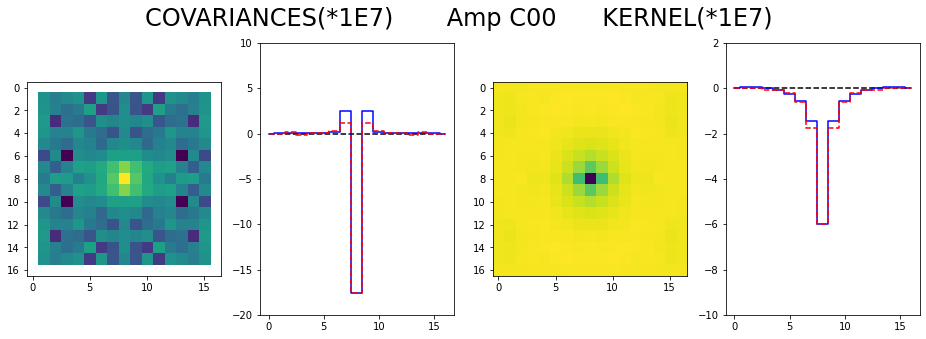

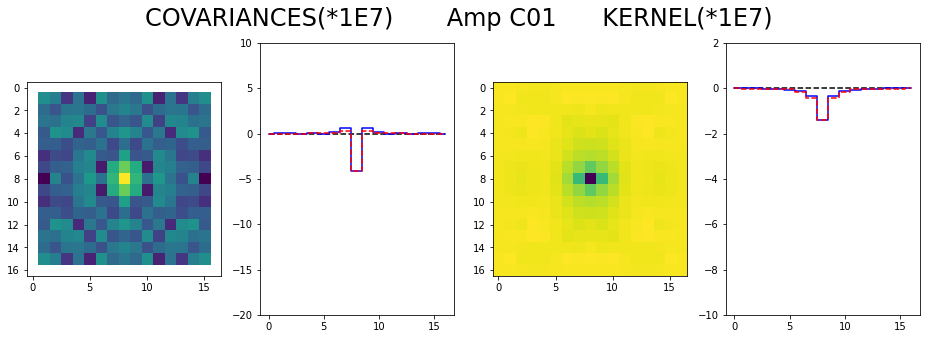

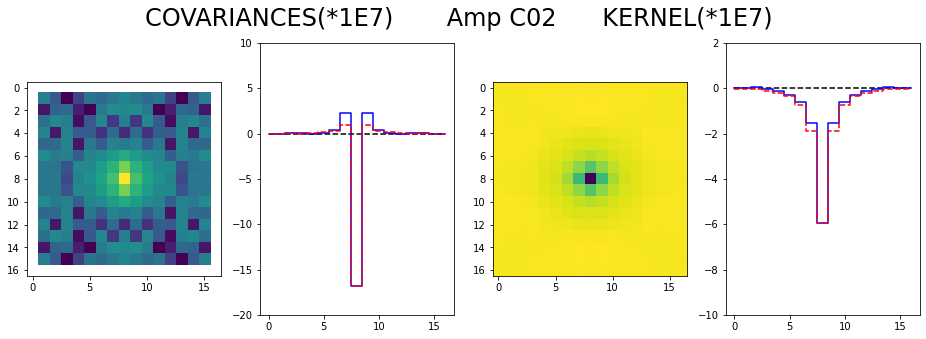

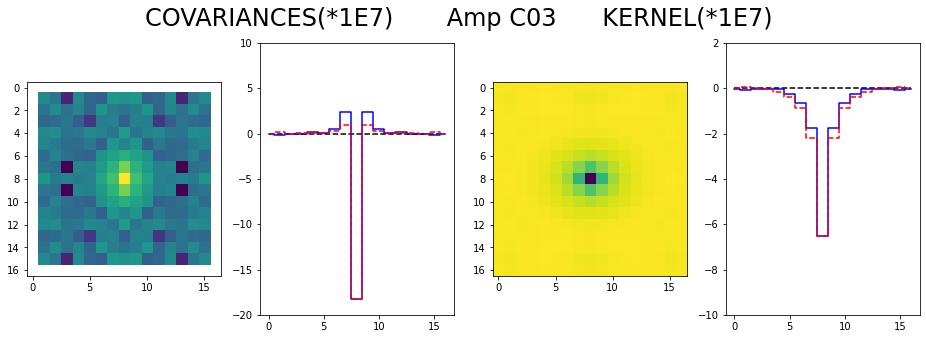

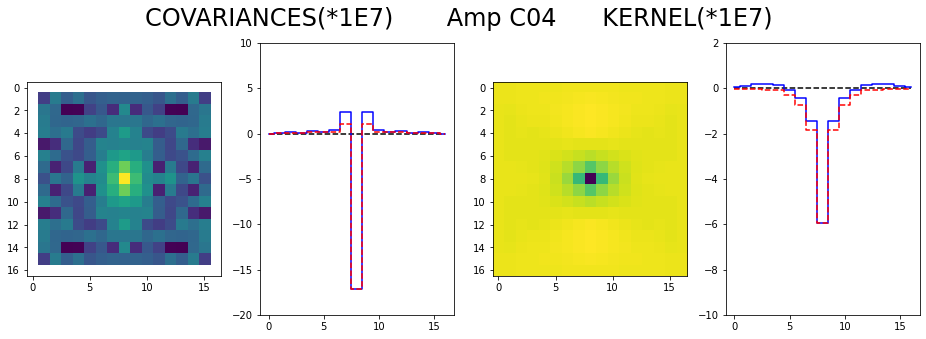

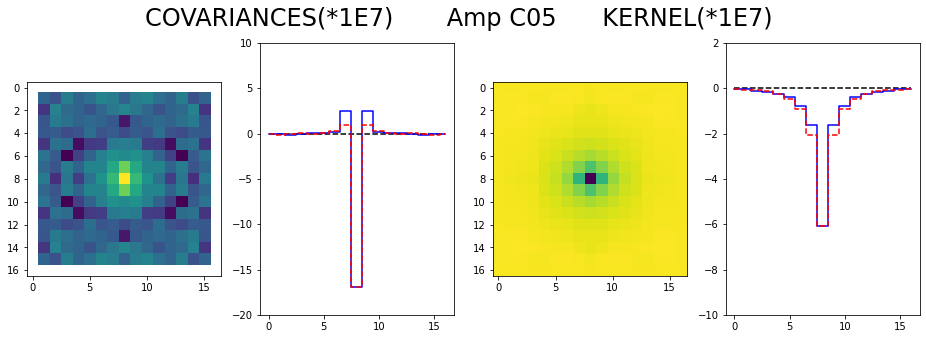

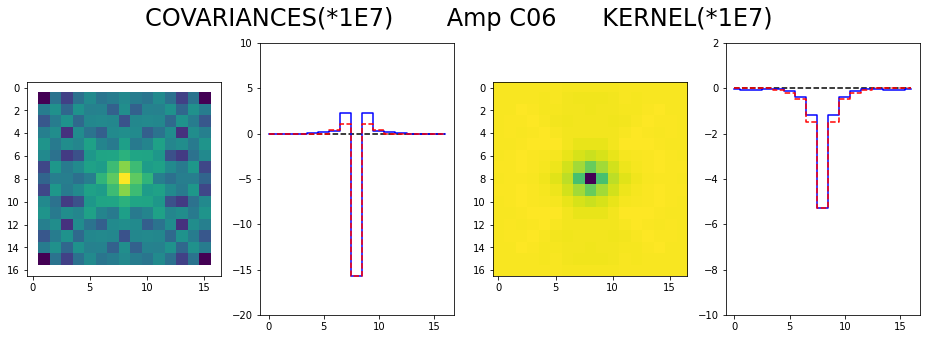

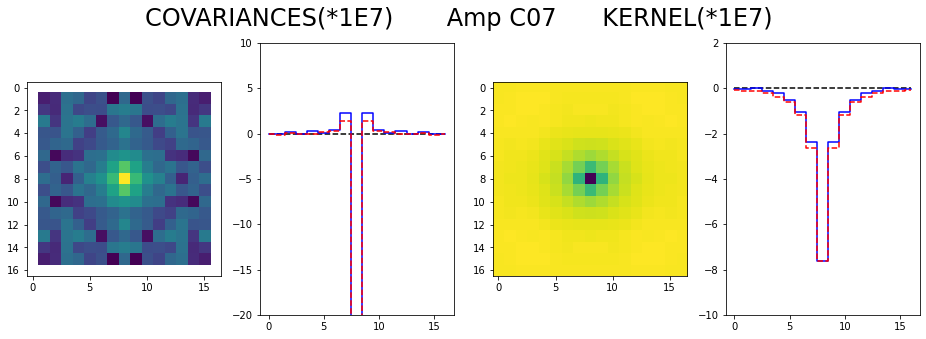

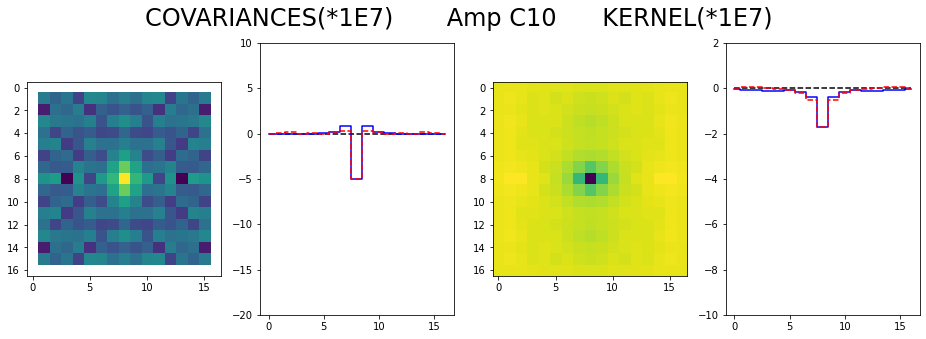

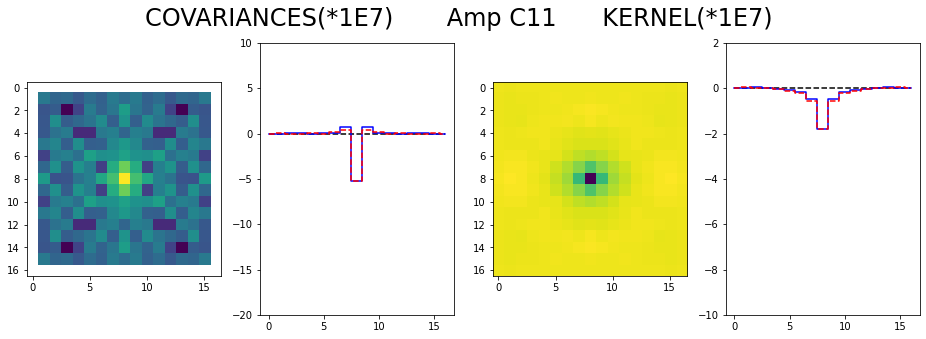

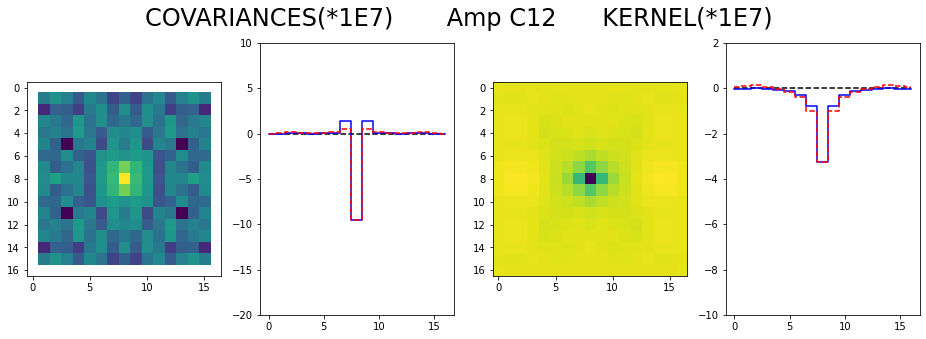

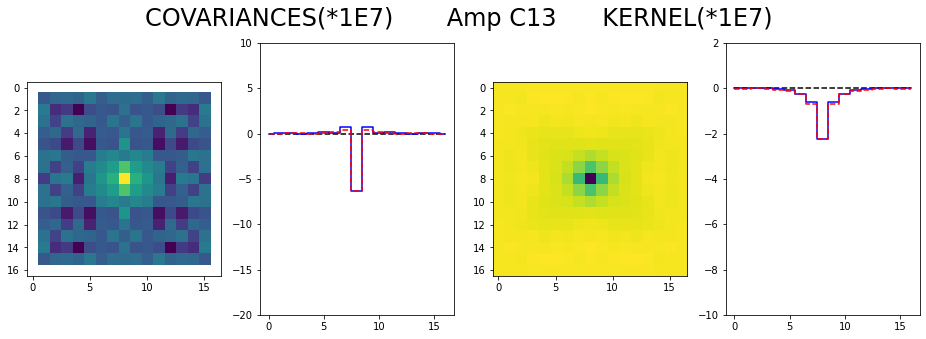

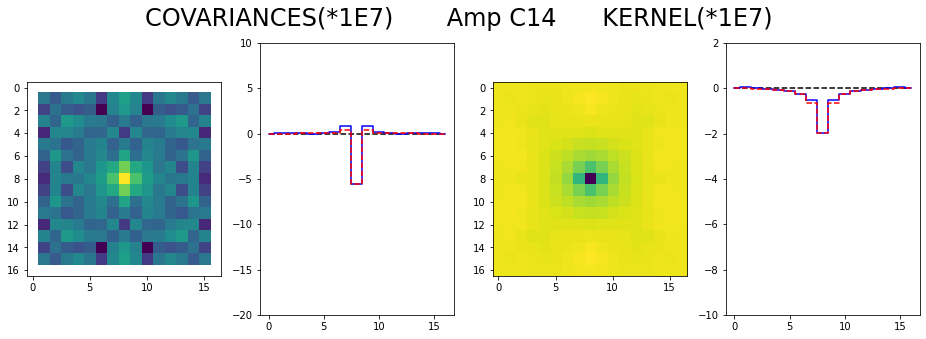

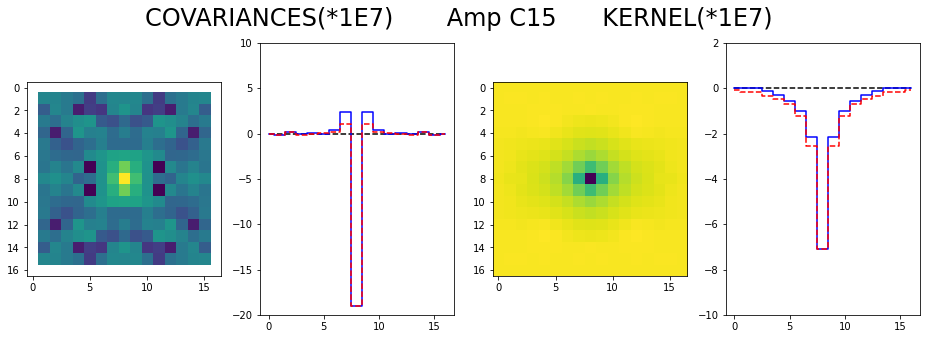

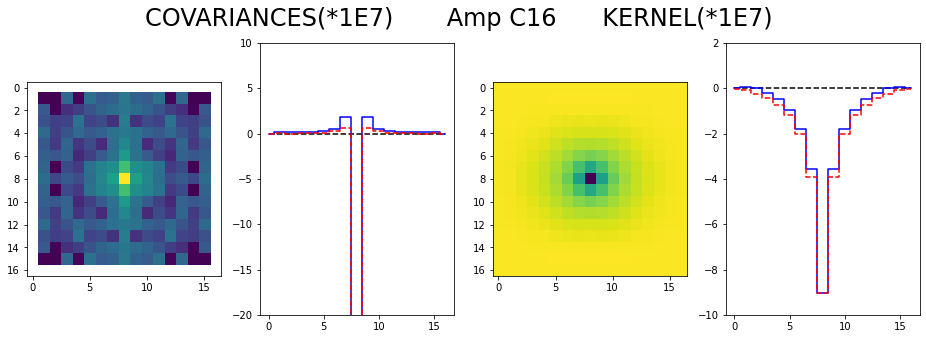

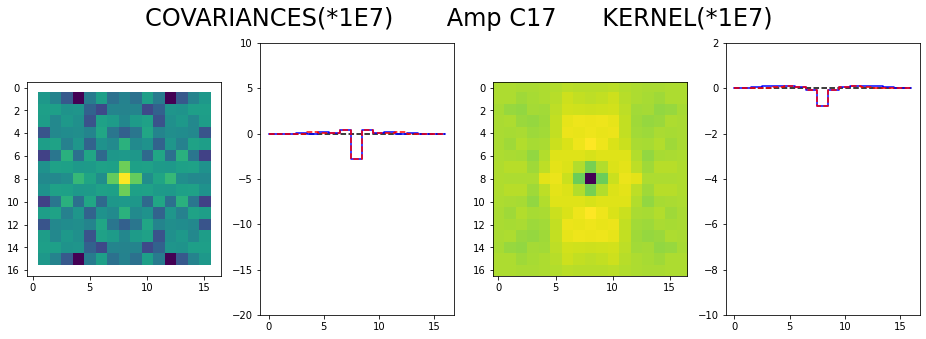

In [5]:
# Now plot the correlations and the kernel. 
for amp in means.keys():
    fig = plt.figure(figsize=(16,5))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("COVARIANCES(*1E7)       Amp %s      KERNEL(*1E7)"%amp, fontsize=24)
    plt.subplot(1,4,1)
    plt.imshow(np.log10(abs(np.array(meanXcorrs[amp]))))
    plt.subplot(1,4,2)
    plt.plot([0,16],[0,0], ls='--', color='black')
    plt.plot(-meanXcorrs[amp][:,8]*1E7, color='blue', drawstyle='steps-mid')
    plt.plot(-meanXcorrs[amp][8,:]*1E7, linestyle='--', color='red', drawstyle='steps-mid')
    plt.ylim(-20,10)
    plt.subplot(1,4,3)
    plt.imshow(kernels[amp])
    plt.subplot(1,4,4)  
    plt.plot([0,16],[0,0], ls='--', color='black')
    plt.plot(kernels[amp][:,8]*1E7, color='blue', drawstyle='steps-mid')
    plt.plot(kernels[amp][8,:]*1E7, linestyle='--', color='red', drawstyle='steps-mid')
    plt.ylim(-10,2)